<center><h1>Recherche Textuelle : Algorithme de Boyer-Moore</h1><center>

* [Introduction](#chapter1)
* [I. Rappels sur les chaînes de caractères](#chapter2)
    * [Application au chapitre](#section_2_1)
* [II. La méthode <code>find</code>](#chapter3)
    * [1. Prise en main](#section_3_1)
    * [2. Prolongement au nombre d'occurences](#section_3_2)
   * [Construction d'un labyrinthe - Mini projet guidé](#section_3_1)
* [III. Un premier algorithme simple et naïf](#chapter4)
   * [1. Implémentation](#section_4_1)
   * [2. Complexité temporelle](#section_4_2)
* [IV. Accélération de recherche](#chapter5)
   * [1. Hypothèse](#section_5_1)
   * [2. Algorithme](#section_5_2)
   * [3. Codage](#section_5_3)
* [V. L'algorithme de Boyer-Moore](#chapter6)
   * [1. Une première idée](#section_6_1)
   * [2. Déroulé de l'algorithme](#section_6_2)
   * [3. Prétraitement](#section_6_3)
   * [4. Implémentation de la table de décalage](#section_6_4)
   * [5. Implémentation de l'algorithme de Boyer-Moore](#section_6_5)
   * [6. Une deuxième possibilité](#section_6_6)
* [VI. Une conclusion en vidéo](#chapter7)
* [VII. En route vers le Grand Oral](#chapter8)
* [VIII. Méthode du Bon Suffixe](#chapter9)

### Introduction <a class="anchor" id="chapter1"></a>

Rechercher une chaîne de caractères dans une autre est un problème récurrent, que ce soit en informatique ou dans d'autres sciences comme par exemple en génétique, dès lors qu'il s'agit de localiser un motif dans une séquence d'ADN.

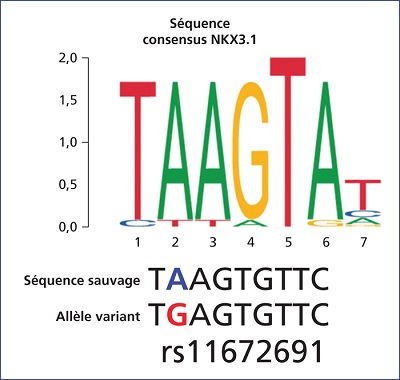

Faire une petite recherche sur les Web Crawlers, donner quelques exemples et expliquer leur mode de fonctionnement. En quoi notre chapitre s'en rapproche-t-il ?

<p>Dans ce chapitre, on va s'intéresser au problème de la recherche des occurences d'une chaîne de caractères, que l'on appelera <em>motif</em> dans une autre chaîne de caractères, que l'on appellera <em>texte</em>.</p><p>Par exemple, il y a deux occurences du motif <strong>"bra"</strong> dans le texte <strong>"abracadabra"</strong>. Plus précisément, on va chercher à quelles positions dans le texte le motif apparaît.

## I. Rappels sur les chaînes de caractère <a class="anchor" id="chapter2"></a>

<p>Une chaîne de caractères peut être écrite au choix entre apostrophes ou entre guillements. Ainsi, on peut écrire indifféremment <strong>'abracadabra'</strong> ou <strong>"abracadabra"</strong>.</p>
<p>La longueur d'une chaîne <code>s</code> est obtenue avec <code>len(s)</code>. Les caractères sont évidemment numérotées à partir de 0. Le (i+1)-ième caractère est obtenu avec <code>s[i]</code>. </p>
<p>La sous-chaîne de <code>s</code> contenant les caractères <code>i</code> inclus à <code>j</code> exclu est obtenu avec <code>s[i:j]</code>. Il s'agit d'une nouvelle chaîne de caractère, la chaine <code>s</code> n'étant pas modifiée. Les caractères et les chaînes peuvent être comparées avec l'opérateur <code>==</code>.

### Application au chapitre <a class="anchor" id="section_1_1"></a>

<p>On note <code>m</code> de longueur $p$ le motif que l'on cherche et <code>t</code> de longueur $n$ le texte dans lequel on le recherche.</p>
<p>Une première remarque évidente est qu'il ne peut y avoir une occurence de <code>m</code> dans <code>t</code> que si $p \leq n$.</p>
<p>Plus précisément, une occurence de <code>m</code> dans <code>t</code> à la position $i$ est contrainte par l'inégalité $0 \leq i \leq n-p$.</p>
<p> Il peut être utile de se représenter une occurence de <code>m</code> dans <code>t</code> à la position $i$ comme ceci : </p>

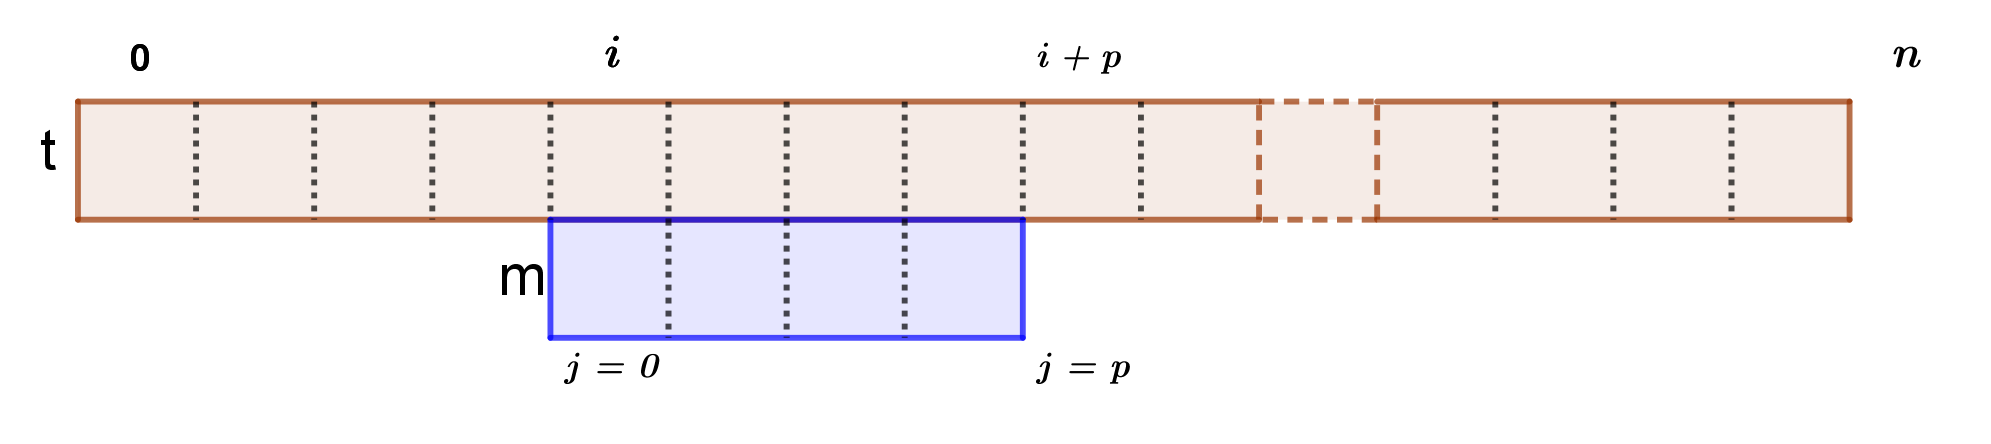

<p>Au dessus, on a représenté les indices des carctères du texte, qui vont de 0 inclus à $n$ exclu. En dessous, on a représenté les indices des caractères du motif, qui vont de 0 inclus à $p$ exclu.</p>
<p>S'il y a une occurence à la position $i$, alors les caractères t[$i$],...,t[$i+p-1$] du texte coïncident avec les caractères m[$0$],...,m[$p-1$] du motif.

<ul>
    <li>Nous notons donc $i$ la position de la fenêtre dans <strong>t</strong> : c’est l’index du premier caractère du texte qui apparaît dans la fenêtre.
<li>Nous notons $j$ l’index dans <strong>m</strong> du caractère du motif que nous comparons avec son analogue du texte : on compare m[$j$] avec t[$i+j$].
<li>La recherche peut se faire à condition que $i+p \leq n$ puisque les caractères du texte qui apparaissent dans la fenêtre ont pour index $i, i + 1, …, i + p − 1$.
    </ul>

## II. La méthode <code>find</code> de Python <a class="anchor" id="chapter3"></a>

<p>Le site <a href="http://www.gutenberg.org/browse/languages/fr">Gutenberg.org</a> propose les grands classiques de la littérature qui sont tombés dans le domaine public. On peut par exemple y trouver le texte intégral du roman Le rouge et le noir de Stendhal dans l’encodage UTF-8 : <a href="http://www.gutenberg.org/ebooks/798.txt.utf-8">Le Rouge et le Noir</a>.</p>
On pourra alors charger en mémoire ce roman par quelques lignes de code pour chercher ensuite si le motif <code>'Julien trembla'</code> apparaît quelque part dans le roman.

### 1. Prise en main<a class="anchor" id="section_3_1"></a>

<strong>Exercice 1</strong>
<p>a. Télécharger le livre Le rouge et le noir et enregistrer-le dans votre répertoire Recherche Textuelle de NSI.</p>
<p>b. Téléverser ce fichier txt dans votre Jupyter Notebook à l'aide de l'upload présent dans File>Open...</p>
<p>c. Expliquer brièvement ce que font les lignes de code ci-dessous.</p>

In [4]:
fichier = open('LeRougeEtLeNoir.txt', 'r')
stendhal = fichier.read()
fichier.close()

<p>c. Déterminer la taille totale du texte.</p>
<p>d. Faites une petite recherche pour savoir comment fonctionne la méthode <code>find</code> de Python.</p>
<p>e. Cherchez maintenant l’index de la première position du motif <code>'Julien trembla'</code> dans le texte du roman.</p>
<p>f. Pouvez-vous donner la suite et la fin de la phrase qui commence par <code>'Julien trembla'</code> ?</p>

In [5]:
fichier = open('LeRougeEtLeNoir.txt', 'r')
stendhal = fichier.read()
print(len(stendhal))
n=stendhal.find('Julien trembla')
print(n)

fichier.close()

1027139
162311


<strong>Remarque :</strong>
<p>La convention choisie par la méthode find est de renvoyer la valeur −1 dans le cas où le motif n’apparaît pas du tout
dans le texte. Par exemple <code>stendhal.find('Joséphine')</code> renvoie −1 : le prénom Joséphine n’apparaît jamais dans le roman.

### 2. Prolongement au nombre d'occurences<a class="anchor" id="section_3_2"></a>

Une variante de la méthode <code>find</code> a deux arguments, le premier corrspondant toujours au motif recherché et le deuxième précisant la position de départ de la recherche.

<strong>Exercice 2</strong>
<p>a. Ecrire la fonction <code>nbOccurences</code> qui calcule le nombre d’occurrences d’un motif dans un texte à l'aide de la méthode <code>find</code>.

In [3]:
def nbOccurences(texte, motif):
    compteur, i = 0, 0
    while True:
        occurrence = texte.find(motif, i)
        # occurrence est l'index du sous-texte à partir de l'index i
        if occurrence == -1:
            return compteur
        else:
            compteur += 1
            i = occurrence + 1

<p>b. Tester votre fonction pour savoir si le mot 'amour' est écrit plus souvent que le mot 'mort' dans le roman Le Rouge et le Noir.</p>

In [4]:
print(nbOccurences(stendhal,'amour'))
print(nbOccurences(stendhal,'mort'))


225
178


## III. Un premier algorithme simple et naïf <a class="anchor" id="chapter4"></a>

<p>L’algorithme naïf consiste simplement à comparer un à un, de gauche à droite, les caractères du texte apparaissant dans la fenêtre avec ceux du motif. En cas de non-correspondance on avance simplement la fenêtre d’une unité vers la droite.</p>
Par exemple, dans la situation suivante,

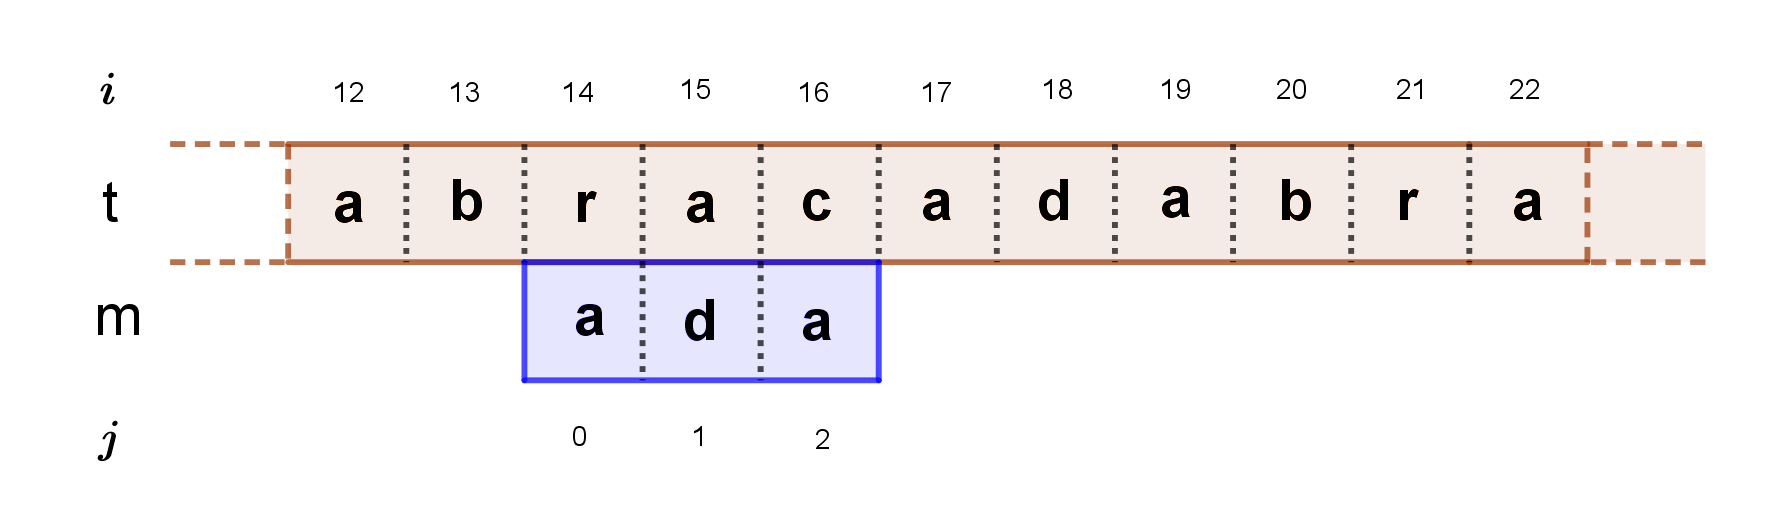

<p>on compare le <code>'a'</code> du motif avec le <code>'r'</code> du texte, obtenant immédiatement une différence : on peut avancer la fenêtre en incrémentant $i$, qui passe de 14 à 15.</p>
Dans la nouvelle fenêtre, le premier caractère coïncide bien :

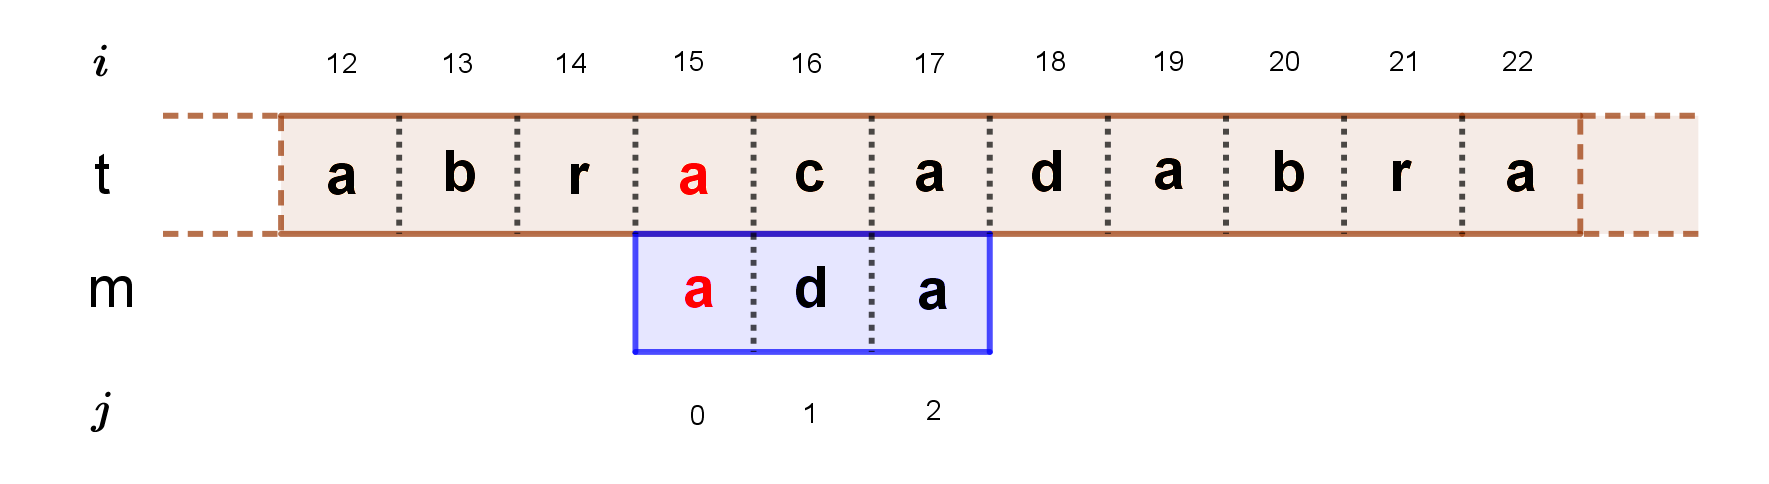

et on incrémente $j$ pour tester les caractères suivants, <code>'d'</code> et <code>'c'</code> :

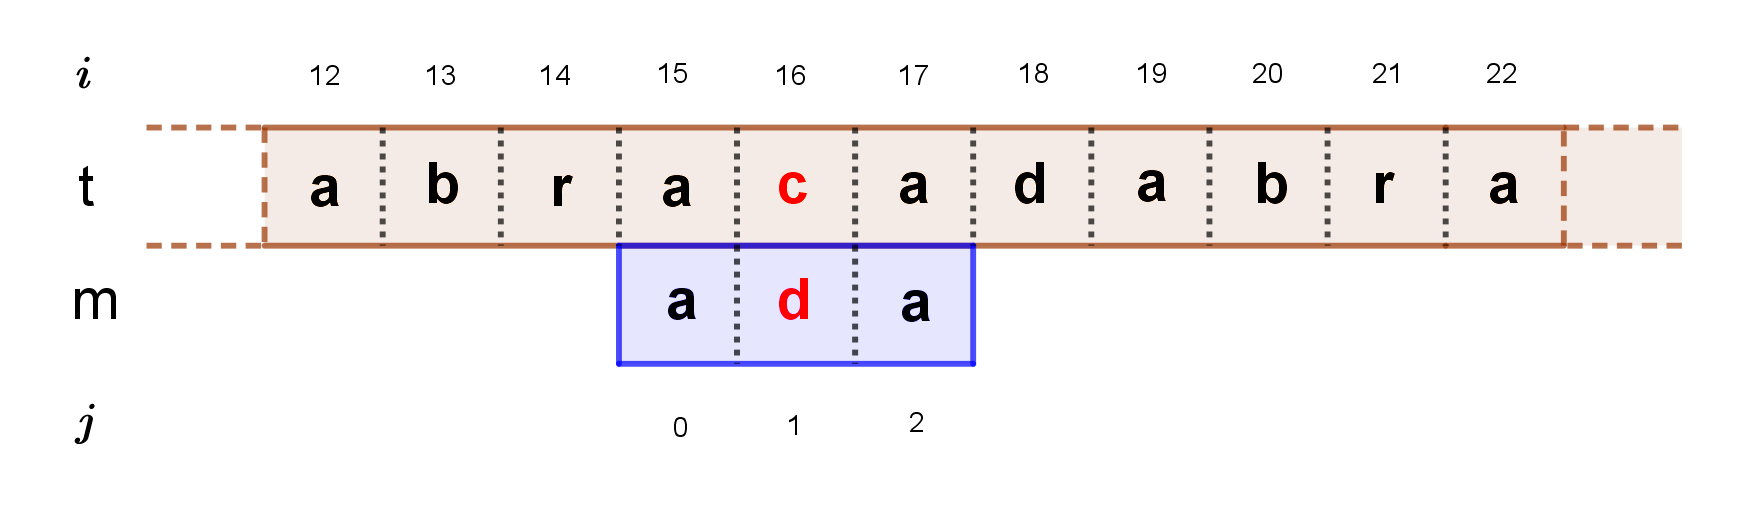

On est à nouveau en situation d’échec. Il faut donc décaler notre motif, et on effectue donc $i = i + 1$ et $j = 0$.

### 1. Implémentation de l'algorithme naïf<a class="anchor" id="section_4_1"></a> 

<strong>Exercice 3</strong>
<p>Implémentez deux fonctions pour effectuer cette recherche de motif dans un texte.</p>
<ul>
<li><code>occurence</code> qui prend en paramètres le motif m, le texte t et un indice i puis renvoie True s'il y a une occurence de la chaîne m dans la chaîne t à la position i ;
<li><code>recherche_Naif</code> qui prend en paramètres le motif m et le texte t puis affiche toutes les occurences de m dans t.
</ul>

In [5]:
texte="abdabrababdraabradbabracadabraabaadaabracadabrarabadaraabracadabraadraba"
motif="abracadabra"

def occurence(m,t,i):
    '''indique s'il y a une occurence de la chaîne m dans la chaîne t à la position i'''
    if i<0 or i>len(t)-len(m):
        return False
    for j in range(len(m)):
        if t[i+j]!=m[j]:
            return False
    return True

def recherche_Naif(m,t):
    '''affiche toutes les occurences de m dans t'''
    for i in range(0,len(t)-len(m)+1):
        if occurence(m,t,i):
            print("occurence à la position",i)

recherche_Naif(motif,texte)

occurence à la position 19
occurence à la position 36
occurence à la position 55


Combien de comparaisons ont-elles été faites pour trouver ce résultat ?

### 2. Complexité temporelle<a class="anchor" id="section_4_2"></a>

L'objectif premier d'un calcul de complexité algorithmique est de pouvoir comparer l’efficacité d’algorithmes résolvant le même problème. Dans une situation donnée, cela permet donc d'établir lequel des algorithmes disponibles est le plus optimal.

Ce type de question est primordial, car pour des données volumineuses la différence entre les durées d'exécution de deux algorithmes ayant la même finalité peut être de l'ordre de plusieurs jours.

Avant de se pencher de manière théorique sur la complexité temporelle, nous allons comparer brièvement la complexité des algorithmes de recherche vus depuis le début de ce cours.
(Re-)Parlons maintenant du module time de Python, testez le programme suivant :

In [6]:
import time
debut = time.time()

In [7]:
# On attend quelques secondes avant de taper la commande suivante
fin = time.time()
print(debut < fin)
fin - debut # Combien de secondes entre debut et fin ?

True


1.0350589752197266

Comparer temporellement maintenant la méthode <code>find</code> de Python et notre algorithme de recherche Naïf sur l'exemple de départ :"Julien trembla" dans le roman "Le rouge et le noir".

L'un semble beaucoup plus rapide que l'autre, il semble donc important d'accélérer notre algorithme de recherche !

## IV. Accélération de recherche <a class="anchor" id="chapter5"></a>

### 1. Hypothèse<a class="anchor" id="section_5_1"></a>

<p>Posons l'hypothèse que chaque lettre du motif n'apparait qu'une seule et unique fois dans ce motif. <br>
Dans une boucle de vérification sur le motif, lorsque le test est négatif (T[$i$+$j$] != M[$j$]): <br>
- La partie du  motif qui précède ne peut contenir cette lettre qu'une seule fois dans une combinaison unique <br>
- Puisque le motif qui précède concorde avec des lettres combinées de manière unique, un nouveau motif recommencera au mieux à l'emplacement du test. <br>
Dans tous les cas le saut suivant serait au minimum de 1, donc rejoindrait la configuration de la recherche naïve.
On peut donc décider de faire un saut égal à l'index du motif de l'échec $j$ avec un saut de 1 au minimum.</p>

<strong>Illustration</strong> :

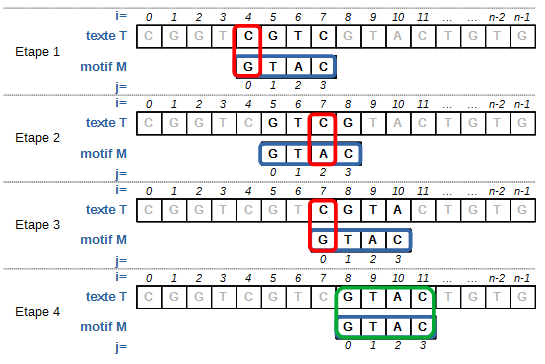

<p>- Etape 1 : Position du motif $i = 4$. Le saut pour passer à l'étape 2 est de 1, saut minimal, puisque la non-concordance est sur la première lettre du motif.<br>
- Etape 2 : Position du masque $i = 5$. Le saut pour passer à l'étape 3 est de 2, puisque la non-concordance est sur la 3eme lettre du motif, d'indice $j$.<br>
- Etape 3 : Position du motif $i = 7$. Le saut pour passer à l'étape 4 est de 1, saut minimal, puisque la non-concordance est sur la première lettre du motif.<br>
- Etape 4 : La position du motif est 8 (7+1) et toutes les lettres du motif concordent avec les lettres du texte</p>

### 2. Algorithme<a class="anchor" id="section_5_2"></a>

<p>Nous partons ici du principe suivant : aucune lettre ne figure plus d'une fois dans le motif recherché</p>
<p>initialisation du <em>Texte</em> <code>t</code> et du <em>Motif</em> <code>m</code><br>
    si longueur(<code>t</code>)est inférieure à longueur(<code>m</code>)<br>
&nbsp;&nbsp;&nbsp;&nbsp;alors on retourne un code d'erreur (-1, par convention)<br>
sinon<br>
&nbsp;&nbsp;&nbsp;&nbsp;on initialise un compteur à 0<br>
&nbsp;&nbsp;&nbsp;&nbsp;pour $i$ inférieur à longueur(<code>t</code>) - longueur(<code>m</code>)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;pour $j$ inférieur à longueur(<code>m</code>)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;si t[$i+j$] et m[$j$] sont différents -->on sort de la boucle et on passe à la lettre suivante dans <code>t</code><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;si m[$j$] est la dernière lettre du motif --> on ajoute 1 au compteur<br>
&nbsp;&nbsp;&nbsp;&nbsp;on retourne la valeur du compteur</p>
<p>Attention : les indices dans python commencent à 0 et la dernière valeur d'une chaine de longueur n est donc n-1</p>

### 3. A vous de coder<a class="anchor" id="section_5_3"></a>

In [8]:
def recherche_Am(m,t):
    '''affiche toutes les occurences de m dans t
    version améliorée avec caracteres uniques dans le motif'''

    if len(t) < len(m):
        return -1
    i = 0 #compteur dans texte t
    while i <= len(t)-len(m)+1:
        j=0
        for j in range(len(m)):
            if m[j] != t[i+j]:
                i += max(1, j)
                break
            elif j == len(m)-1 and m[j] == t[i+j]:
                print("occurence à la position",i)
                i+= len(m)

<strong>Application à notre exemple filé</strong> :

Faire la recherche <code>'Julien trembla'</code> dans le texte du roman et comparer les temps de recherche entre <code>Recherche_Naif</code> et notre dernière fonction.

In [9]:
recherche_Am('Julien trembla',stendhal)

occurence à la position 162311


## V) Boyer-Moore version simplifiée de Horspool <a class="anchor" id="chapter6"></a>

### 1. Une première idée pour accélérer la recherche<a class="anchor" id="section_6_1"></a>

<ul>
    <li>L'idée est d'améliorer la recherche en utilsant certaines <strong>heuristiques</strong> dont nous détaillerons la première.
    <li>L'algorithme est aussi à fenêtre glissante comme dans la recherche naïve mais la comparaison du motif avec le texte, <code>m[0:p-1]</code> avec <code>t[i:i+p-1]</code>, se fait <strong>de droite à gauche</strong>, en commençant par la fin !
    <li> La première heuristique, souvent appelée celle du "mauvais caractère", va tirer parti du parcours inversé en testant d'abord s'il y a correspondance pour le dernier caractère du motif.
        <li> Par exemple dans la recherche suivante de <code>m</code> dans <code>t</code>:
   </ul>

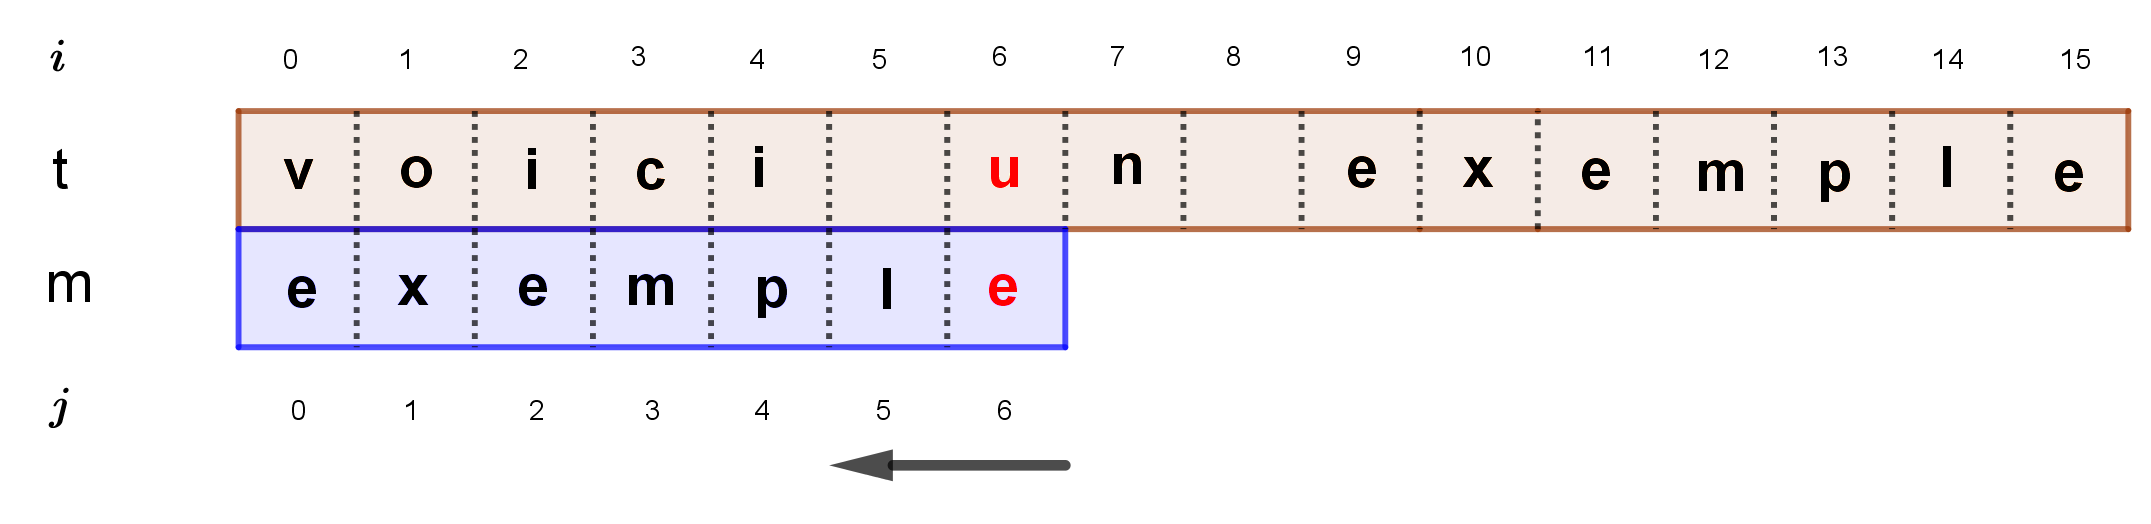

On voit que "e" et "u" ne correspondent pas. Comme "u" n'apparaît pas dans le motif, nous pouvons faire glisser le motif vesr la drote de sa propre longueur (ici 7) en état sûr de ne manquer aucune correspondance. 

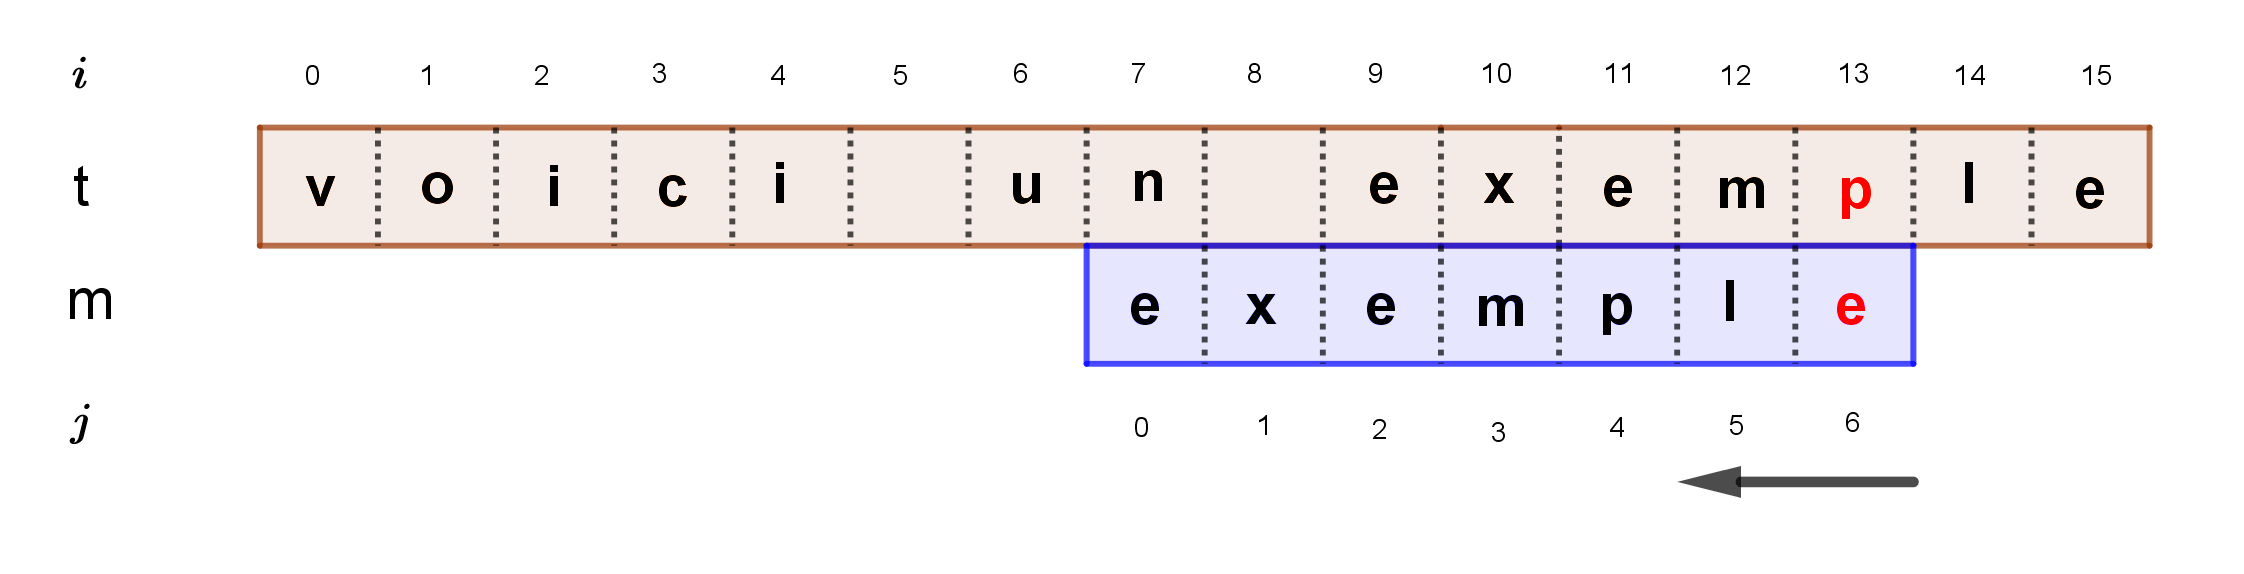

Et même si le caractère de <code>t</code> apparaît ailleurs dans <code>m</code>, lorsque l'on fait la comparaison t[$i$+$j$]==m[$j$], si t[$i$+$j$]=a ne correspond pas, on aligne alors l'occurence la plus à droite de a  dans m[$0:p-1$] avec t[$i$+$j$].

### 2. Déroulement de l'algorithme<a class="anchor" id="section_6_2"></a>

### Exercice 4 : Un exemple à faire à la main
Appliquer l'algorithme vu précedemment à l'exemple suivant en déroulant les étapes à la main et en commençant à appréhender son codage futur.

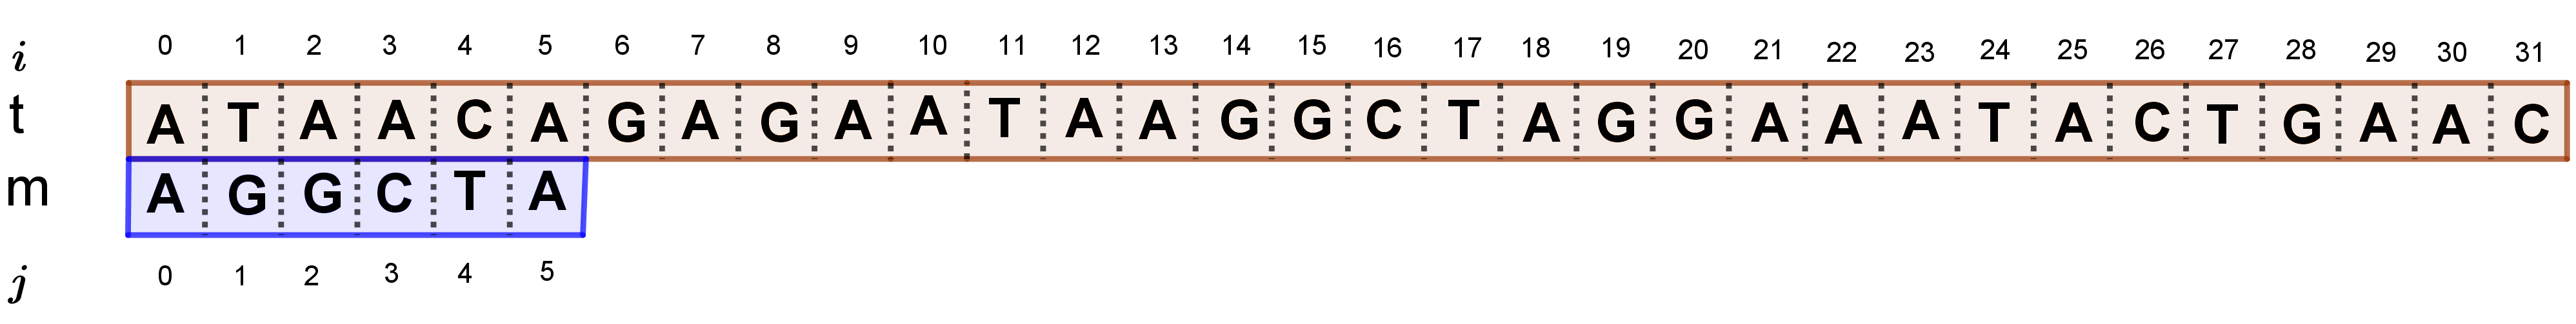

<ol>
    <li> Que faire si la lettre du texte n'apparaît pas dans le motif ? 
    <li> Dans quel cas le décalage est-il le moins important ?
    <li> Chaque décalage fait est-il unique ?
    <li> Que pourrait-on faire avant de commencer les comparaisons ?
 </ol>

### 3. Prétraitement <a class="anchor" id="section_6_3"></a>

<p>A travers l'exemple vu précédemment, on peut facilement comprendre l'utilité de construire une première table qui indique la distance maximale de chaque caractère distinct au dernier dans le motif. Cette table ne dépend que du motif et pas du texte.</p>
<br>
<strong> Exercice 5</strong>
<ol>
<li>Construire cette table pour le motif "AGGCTA".
<li>Construire la table permettant le prétraitement de "banane".
<li>Quelle structure de données paraît adaptée pour stocker le caractère et son décalage ?
</ol>

### 4. Implémentation de la table de décalage <a class="anchor" id="section_6_4"></a>

<ol>
    <li>On commence par construire un tableau de taille <code>len(m)</code>, où chaque élément est un un dictionnaire vide.
    <li>On remplit alors tous ces dictionnaires avec un double boucle sur tous les indices $j$ et sur tous les indices $k<j$.
    <li>Pour chaque paire d'indices $j$ et $k$, il suffit de renseigner la clé <code>m[k]</code> du dictionnaire <code>d[j]</code> avec la valeur $k$.
    <li>Comme on parcourt les indices $k$ de plus petit au plus grand, plusieurs occurences d'un même caractère vont donner plusieurs affectations dans le dictionnaire, chacune écrasant la précédente.
    <li>On termine en renvoyant la table.

<strong>Exercice 6</strong>
<p>Implémentez cet algorithme en Python puis testez-le sur les données de l'exercice 5.</p>

In [8]:
def table_MC(motif):
# remplit (partiellement) un dictionnaire pour donner les décalages MC dans l'algorithme de Boyer-Moore
    p=len(motif)
    dico_MC = {}
    for j in range(p):
        dico_MC[motif[j]] =p-j-1
    return dico_MC

In [4]:
table_MC('AGGCTA')

{'A': 0, 'G': 3, 'C': 2, 'T': 1}

In [5]:
table_MC('BANANE')

{'B': 5, 'A': 2, 'N': 1, 'E': 0}

<strong>Remarque :</strong>
<p>On utilisera cette fonction dans une deuxième implémentation un peu moins progressive en 6.</p> 

### 5. Implémentation progressive de l'algorithme de Boyer-Moore<a class="anchor" id="section_6_5"></a>

<strong>Exercice 7</strong>

Commençons par implémenter une fonction <code>Dico_droite</code> qui calculera un dictionnaire dont les clés sont les caractères du motif et les valeurs la position la plus à droite du caractère.

In [17]:
def Dico_Droite(motif):
# remplit (partiellement) un dictionnaire pour donner les positions les plus à droite de chaque caractère
    p=len(motif)
    aDroite = {}
    for j in range(p):
        aDroite[motif[j]] = j
    return aDroite

<p>C'est un bon début mais on voudrait calculer le décalage de la fenêtre même quand le caractère qui provoque l’échec n’apparaît pas dans le motif.</p>
<p>Coder maintenant la fonction <code>droite</code> qui renvoie −1 si le caractère n’est pas dans le dictionnaire <code>aDroite</code>.</p>

In [26]:
def droite(c,motif):
    # renvoie -1 si c n'est pas dans le motif ou sinon aDroite[c]
    aDroite=Dico_Droite(motif)
    if c in aDroite.keys():
        return aDroite[c]
    else:
        return -1

<strong>Exercice 8</strong>

Coder maintenant une fonction <code>correspondance</code> où le parcours du motif se fait de droite à gauche
et où le calcul du décalage se déduit du dictionnaire <code>aDroite</code>. Cette fonction prendra en paramètres le texte, le motif et l'indice $i$. Elle renverra sous la forme d'un tuple si les caractères correspondent à l'indice $i$ et le décalage nécessaire s'il y a "mismatch". Attention à avoir toujours un décalage minimum quand les caractères ne correspondent pas !

In [27]:
def correspondance(texte, motif,i):
    p=len(motif)
    for j in range(p - 1, -1, -1): # j varie de p-1 à 0 inclus en décroissant
        x = texte[i + j]
        if x != motif[j]:
            decalage = max(1, j - droite(x,motif))
            return (False, decalage)
    return(True, 0)

<strong>Exercice 9</strong>

Il nous reste maintenant à implémenter la fonction <code>cherche</code> qui donnera les occurences de notre motif dans notre texte. Elle prendra en paramètres le motif et le texte. Pour cela, on utlisera les fonctions <code>Dico_droite</code> et <code>correspondance</code>. 

In [28]:
def Recherche_BM(texte, motif):
    n = len(texte)
    p = len(motif)
    Dico_Droite(motif)
    i = 0
    while i + p <= n:
        ok, decalage = correspondance(texte, motif, i)
        if ok:
            print('occurence en', i)
            i+=1
        else:
            i = i + decalage

In [30]:
Recherche_BM(stendhal,"Julien trembla")

occurence en 162311


### 6. Une deuxième possibilité<a class="anchor" id="section_6_6"></a>

<strong>Exercice 10</strong>

A l'aide de la fonction <code>table_MC</code> étudiée précédemment, codez d'une deuxième façon l'algorithme de Boyer-Moore :

In [19]:
def recherche_BM2(motif,texte):
    '''affiche toutes les occurences de m dans t avec l'algorithme de Boyer-Moore'''
    table_Decalage=table_MC(motif)
    i=0
    while i <= len(texte)-len(motif):
        for j in range(len(motif)-1, -1, -1):
            
            if motif[j] == texte[j+i]:
                if j == 0:
                    print("occurence à la position :", i)
                    i += len(motif)
            else:
                if texte[i+j] in table_Decalage:
                    if table_Decalage[texte[i+j]] == 0:
                        i += 1
                    else:
                        i += table_Decalage[texte[i+j]]
                else:
                    i += len(motif)
                break #sortie de la boucle for

In [18]:
recherche_BM2('Julien trembla',stendhal)

occurence à la position : 162311


## VI. Conclusion : Une vidéo récapitulative <a class="anchor" id="chapter7"></a>

In [31]:
from IPython.display import HTML

# Youtube
HTML('<center><iframe width="560" height="315" src="https://www.youtube.com/embed/cjPv3fyarxU?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe></center>')

## VII. En route vers le grand oral<a class="anchor" id="chapter8"></a>

<p>Il s'agit de préparer un petit exposé d'environ 10 minutes pour présenter l'un des différents algorithmes de recherche suivant ou un problème qui s'y rattache :</p>
<ul>
    <li>recherche naïf
    <li>Boyer-Moore
    <li>Knuth-Morris-Pratt
    <li>distance de Levenshtein
</ul>

## VIII. Pour aller plus loin : méthode du bon suffixe<a class="anchor" id="chapter9"></a>

L'algorithme de Boyer-Moore dispose d'une deuxième heuristique appelée du "bon suffixe", un tableau BS est utilisé dont chaque entrée BS[$i$] contient le décalage du motif en cas d'erreur de correspondance en position $i-1$, si le suffixe (la fin) du motif commençant position $i$ correspond.

<strong>Exercice 11</strong>
<p>En reprenant l'exemple précédent, appliquez à la main la règle du Bon Suffixe uniquement puis les règles Mauvais Caractère et Bon Suffixe. A t-on gagné en nombre de comparaison ?</p>

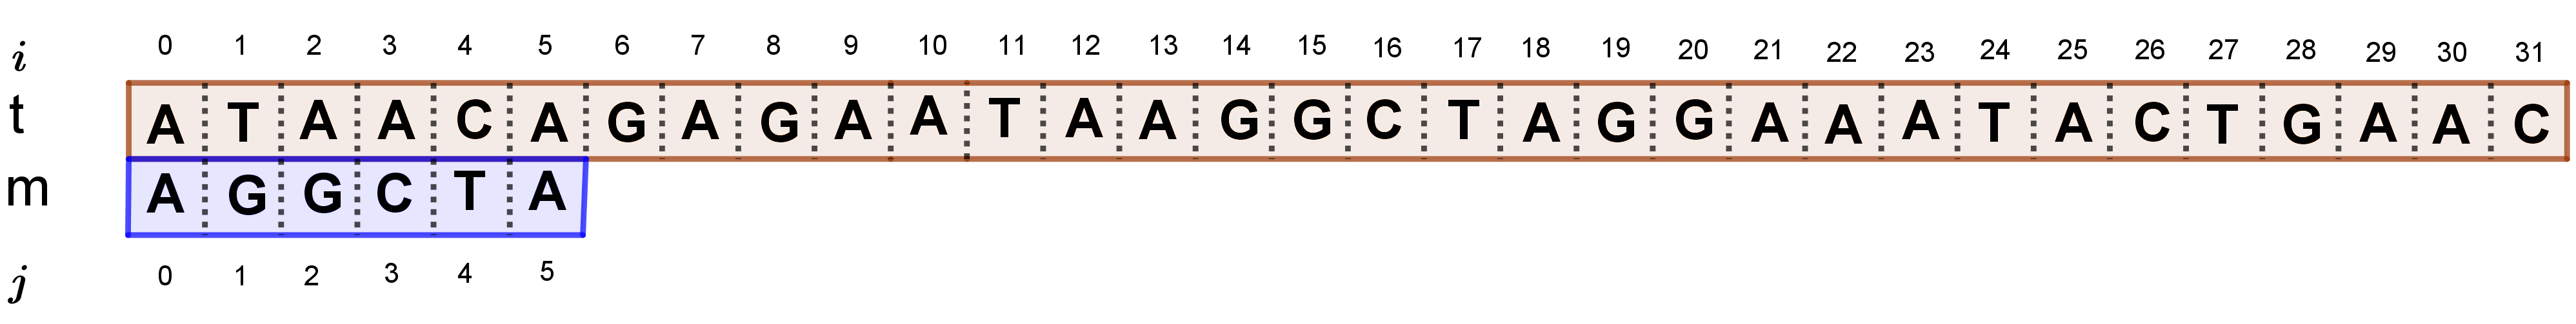

Le code pour remplir notre tableau BS est donné ci-dessous. Prenez-le temps de le comprendre et résumer en quelques lignes son fonctionnement.

In [ ]:
# calcul préalable de BS
# (attention, il s'agit probablement de l'implémentation la moins efficace
# mais peut-être la plus claire)

# calcul du plus grand préfixe qui est également suffixe (mais pas M tout entier)
pref_suff = m
for i in range(m-1):
    # on vérifie que la fin (entre m-(i+1) et m est identique au début (entre 0 et i+1)
    if M[0:i+1] == M[m-(i+1):m]:
        pref_suff = m-(i+1)
    
BS = [pref_suff] * m
BS[m-1] = 1 # cas particulier pour le dernier symbole de M
# recherche du prochain motif le plus à droite
i = m - 2
while (i >= 0):
    # motif à rechercher
    MM = M[i+1:m]
    l_MM = len(MM)
    k = i
    # on cherche le motif "à rebours"
    while (k>=0):
        if (M[k:k+l_MM] == MM) and ((k==0) or (M[k-1]!=M[i])):
            print("à l'index " + str(i) + " : sous-motif " + MM + " trouvé en " + str(k))
            BS[i] = i - k + 1
            break;
        k = k - 1
    i = i - 1

<strong>Exercice 10</strong>
<p>Ajouter la règle du Bon Suffixe à notre algorithme de Boyer-Moore version Horspool